# 이상치 찾기

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('./archive/basic1.csv')

## 소수점 데이터 찾기

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      100 non-null    object 
 1   age     100 non-null    float64
 2   city    100 non-null    object 
 3   f1      69 non-null     float64
 4   f2      100 non-null    int64  
 5   f3      5 non-null      object 
 6   f4      100 non-null    object 
 7   f5      100 non-null    float64
dtypes: float64(3), int64(1), object(4)
memory usage: 6.4+ KB


In [5]:
df[(df['age']-np.floor(df["age"]))!=0]

,id,age,city,f1,f2,f3,f4,f5
6,id07,36.3,서울,60.0,1,NaN,ISFJ,9.796378
8,id09,3.3,서울,35.0,2,NaN,ESFJ,17.252986
21,id22,-6.3,부산,72.0,1,NaN,ENFP,52.667078
28,id29,-13.5,부산,47.0,2,NaN,ENTP,67.886373
46,id47,34.6,대구,75.0,1,NaN,ESTJ,90.496999
64,id65,26.5,경기,NaN,0,NaN,ISFP,91.297791
84,id85,83.6,경기,55.0,0,NaN,INFJ,80.138280
92,id93,21.8,경기,57.0,0,NaN,ISFP,73.586397


In [7]:
np.floor(df["age"])

0       2.0
1       9.0
2      27.0
3      75.0
4      24.0
      ...  
95     92.0
96    100.0
97     39.0
98      1.0
99     47.0
Name: age, Length: 100, dtype: float64

In [11]:
# 올림 : 
m_ceil=np.ceil(df['age']).mean()
# 내림 
m_floor=np.ceil(df['age']).mean()
# 버림
m_trunc = np.trunc(df['age']).mean()

In [12]:
print(m_ceil+m_floor+m_trunc)

152.94


# map 활용한 결측치 처리하기

In [13]:
df=pd.read_csv('./archive/basic1.csv')

In [14]:
df.head()

,id,age,city,f1,f2,f3,f4,f5
0,id01,2.0,서울,NaN,0,NaN,ENFJ,91.297791
1,id02,9.0,서울,70.0,1,NaN,ENFJ,60.339826
2,id03,27.0,서울,61.0,1,NaN,ISTJ,17.252986
3,id04,75.0,서울,NaN,2,NaN,INFP,52.667078
4,id05,24.0,서울,85.0,2,NaN,ISFJ,29.269869


In [17]:
df.shape[0]

100

## 결측값 확인하기

In [18]:
df.isnull().sum()/df.shape[0]

id      0.00
age     0.00
city    0.00
f1      0.31
f2      0.00
f3      0.95
f4      0.00
f5      0.00
dtype: float64

In [19]:
df=df.drop(['f3'],axis=1)
df.shape

(100, 7)

### unique() : 고유한 값 확인

In [20]:
df['city'].unique()

array(['서울', '부산', '대구', '경기'], dtype=object)

In [21]:
df.groupby("city")['f1'].median()

city
경기    58.0
대구    75.0
부산    62.0
서울    68.0
Name: f1, dtype: float64

In [22]:
k,t,b,s=58.0,75.0,62.0,68.0

In [28]:
df['f1']=df['f1'].fillna(df['city'].map({'서울':s,'경기':k,'부산':b,'대구':t}))

In [29]:
df

,id,age,city,f1,f2,f4,f5
0,id01,2.0,서울,68.0,0,ENFJ,91.297791
1,id02,9.0,서울,70.0,1,ENFJ,60.339826
2,id03,27.0,서울,61.0,1,ISTJ,17.252986
3,id04,75.0,서울,68.0,2,INFP,52.667078
4,id05,24.0,서울,85.0,2,ISFJ,29.269869
...,...,...,...,...,...,...,...
95,id96,92.0,경기,53.0,1,ENTJ,52.667078
96,id97,100.0,경기,58.0,0,INFP,67.886373
97,id98,39.0,경기,58.0,2,INFP,98.429899
98,id99,1.0,경기,47.0,0,ESFJ,97.381034


In [30]:
df['f1'].mean()

65.52

# 왜도/첨도 구하기

In [31]:
df=pd.read_csv('./archive/train.csv')

In [32]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

<AxesSubplot:>

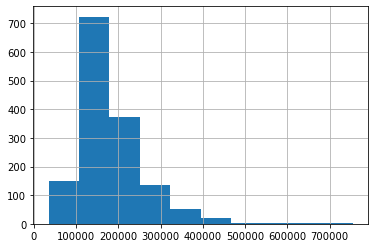

In [34]:
df['SalePrice'].hist()

In [36]:
df['SalePrice'].skew()

1.8828757597682129

In [37]:
df['SalePrice'].kurt()

6.536281860064529

## log 변환 (np.log1p)

In [38]:
df['SalePrice']=np.log1p(df['SalePrice'])

In [39]:
df['SalePrice']

0       12.247699
1       12.109016
2       12.317171
3       11.849405
4       12.429220
          ...    
1455    12.072547
1456    12.254868
1457    12.493133
1458    11.864469
1459    11.901590
Name: SalePrice, Length: 1460, dtype: float64

In [40]:
df['SalePrice'].skew()

0.12134661989685333

In [41]:
df['SalePrice'].kurt()

0.809519155707878

<AxesSubplot:>

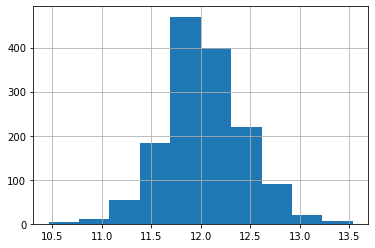

In [42]:
df['SalePrice'].hist()

In [44]:
np.log1p(np.exp(1)-1)

1.0

# 표준편차 구하기 (조건 별)

In [45]:
df=pd.read_csv('./archive/basic1.csv')

In [46]:
df.head()

,id,age,city,f1,f2,f3,f4,f5
0,id01,2.0,서울,NaN,0,NaN,ENFJ,91.297791
1,id02,9.0,서울,70.0,1,NaN,ENFJ,60.339826
2,id03,27.0,서울,61.0,1,NaN,ISTJ,17.252986
3,id04,75.0,서울,NaN,2,NaN,INFP,52.667078
4,id05,24.0,서울,85.0,2,NaN,ISFJ,29.269869


In [48]:
df[df['f4']=='ENFJ'].describe()

,age,f1,f2,f5
count,6.000000,4.000000,6.000000,6.000000
mean,48.166667,76.750000,0.333333,48.130763
std,37.822833,17.727098,0.516398,30.933708
min,2.000000,55.000000,0.000000,13.049921
25%,18.500000,66.250000,0.000000,22.218174
50%,50.000000,79.000000,0.000000,48.726782
75%,74.000000,89.500000,0.750000,67.382691
max,97.000000,94.000000,1.000000,91.297791


In [49]:
df[df['f4']=='ENFJ'].f1.std()

17.727097901235837

In [50]:
df[df['f4']=='INFP'].f1.std()

23.586719427112648

In [52]:
np.abs(df[df['f4']=='ENFJ'].f1.std()-df[df['f4']=='INFP'].f1.std())

5.859621525876811

# 결측치 제거 및 그룹 합계

In [53]:
df=pd.read_csv('./archive/basic1.csv')

In [54]:
df.tail()

,id,age,city,f1,f2,f3,f4,f5
95,id96,92.0,경기,53.0,1,NaN,ENTJ,52.667078
96,id97,100.0,경기,NaN,0,NaN,INFP,67.886373
97,id98,39.0,경기,58.0,2,NaN,INFP,98.429899
98,id99,1.0,경기,47.0,0,NaN,ESFJ,97.381034
99,id100,47.0,경기,53.0,0,vip,ESFP,33.308999


## notnull():결측치가 아닌 값

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      100 non-null    object 
 1   age     100 non-null    float64
 2   city    100 non-null    object 
 3   f1      69 non-null     float64
 4   f2      100 non-null    int64  
 5   f3      5 non-null      object 
 6   f4      100 non-null    object 
 7   f5      100 non-null    float64
dtypes: float64(3), int64(1), object(4)
memory usage: 6.4+ KB


### sum 함수를 활용한 결측치가 아닌 값들

In [62]:
df.f1.notnull().sum(0)

69

In [63]:
df.f1.notnull().sum()

69

In [64]:
df2=df.groupby(['city','f2']).sum()
df2

age     f1           f5
city f2                            
경기   0   1088.9  833.0  1391.927648
     1    976.0  670.0   935.958628
     2    239.0  311.0   362.300060
대구   0    578.0  527.0   371.184620
     1    393.6  235.0   404.779978
     2    140.0  211.0    79.667919
부산   0    481.0  389.0   395.272907
     1    430.7  315.0   460.657406
     2     16.5   47.0   101.195372
서울   0    220.0  278.0   484.809540
     1    389.3  534.0   506.371383
     2    143.3  207.0   179.328213

In [66]:
list(df2.columns)

['age', 'f1', 'f5']

In [69]:
df2.iloc[0]["f1"]

833.0

# 2개이상 조건으로 값 변경하기

In [73]:
df=pd.read_csv('./archive/basic1.csv')

In [75]:
df[df['f4']=="ESFJ"]

,id,age,city,f1,f2,f3,f4,f5
8,id09,3.3,서울,35.0,2,NaN,ESFJ,17.252986
12,id13,15.0,서울,68.0,0,NaN,ESFJ,83.685380
30,id31,86.0,부산,77.0,0,NaN,ESFJ,73.586397
58,id59,64.0,대구,NaN,1,NaN,ESFJ,20.129444
98,id99,1.0,경기,47.0,0,NaN,ESFJ,97.381034


In [78]:
df['f4'].replace("ESFJ","ISFJ",inplace=True)

In [79]:
df['f4']

0     ENFJ
1     ENFJ
2     ISTJ
3     INFP
4     ISFJ
      ... 
95    ENTJ
96    INFP
97    INFP
98    ISFJ
99    ESFP
Name: f4, Length: 100, dtype: object

In [81]:
df[(df['f4'] == 'ISFJ') & (df['city'] == '경기')]['age'].max()

90.0

# 누적합과 보간

In [84]:
s = pd.Series([np.nan, "퇴근후", np.nan,"딴짓", np.nan, 22, np.nan,45, np.nan, np.nan, 60])
print(s)
s.fillna(method="pad")

0     NaN
1     퇴근후
2     NaN
3      딴짓
4     NaN
5      22
6     NaN
7      45
8     NaN
9     NaN
10     60
dtype: object


0     NaN
1     퇴근후
2     퇴근후
3      딴짓
4      딴짓
5      22
6      22
7      45
8      45
9      45
10     60
dtype: object

In [89]:
s = pd.Series([np.nan, "퇴근후", np.nan,"딴짓", np.nan, 22, np.nan,45, np.nan, np.nan, 60])
print(s)
s.fillna(method="bfill")

0     NaN
1     퇴근후
2     NaN
3      딴짓
4     NaN
5      22
6     NaN
7      45
8     NaN
9     NaN
10     60
dtype: object


0     퇴근후
1     퇴근후
2      딴짓
3      딴짓
4      22
5      22
6      45
7      45
8      60
9      60
10     60
dtype: object

In [87]:
df=pd.read_csv('./archive/basic1.csv')
df.f1

0      NaN
1     70.0
2     61.0
3      NaN
4     85.0
      ... 
95    53.0
96     NaN
97    58.0
98    47.0
99    53.0
Name: f1, Length: 100, dtype: float64

In [91]:
df2=df.f1.cumsum()
df2

0        NaN
1       70.0
2      131.0
3        NaN
4      216.0
       ...  
95    4399.0
96       NaN
97    4457.0
98    4504.0
99    4557.0
Name: f1, Length: 100, dtype: float64

In [93]:
df2.fillna(method='pad')

0        NaN
1       70.0
2      131.0
3      131.0
4      216.0
       ...  
95    4399.0
96    4399.0
97    4457.0
98    4504.0
99    4557.0
Name: f1, Length: 100, dtype: float64

# 수치형 변수 정규화

In [94]:
from sklearn.preprocessing import StandardScaler
data = [[0, 2], [0.4, 0.2], [1.1, 10], [11, 19], [34, 21], [6, 40]]
scaler = StandardScaler()
print(scaler.fit(data))
print(scaler.transform(data))

StandardScaler()
[[-0.73299648 -0.99206078]
 [-0.69948807 -1.125655  ]
 [-0.64084835 -0.39830869]
 [ 0.18848481  0.26966241]
 [ 2.11521842  0.41810043]
 [-0.23037032  1.82826164]]


In [95]:
df=pd.read_csv('./archive/basic1.csv')

In [96]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [99]:
scaler.fit(df[['f5']])

StandardScaler()

In [104]:
a=scaler.transform(df[['f5']])

In [106]:
df['f5']=scaler.transform(df[['f5']])

In [108]:
df['f5'].median()

0.26061962955901524

In [109]:
df.describe()

,age,f1,f2,f5
count,100.000000,69.000000,100.000000,1.000000e+02
mean,50.963000,66.043478,0.650000,3.164136e-16
std,30.442759,19.453893,0.715979,1.005038e+00
min,-13.500000,12.000000,0.000000,-1.657912e+00
25%,26.875000,51.000000,0.000000,-9.700848e-01
50%,52.500000,63.000000,1.000000,2.606196e-01
75%,77.000000,78.000000,1.000000,8.579701e-01
max,100.000000,111.000000,2.000000,1.472730e+00


# 여-존슨 변환 box-cox 변환

In [110]:
from sklearn.preprocessing import power_transform
data = [[11, 12], [23, 22], [34, 35]]
print(power_transform(data)) # method 디폴트 값은 여-존슨’yeo-johnson’
print(power_transform(data, method='box-cox'))

[[-1.27332767 -1.24414502]
 [ 0.10376846  0.03976901]
 [ 1.16955921  1.20437601]]
[[-1.27548765 -1.24611441]
 [ 0.1087368   0.04392064]
 [ 1.16675085  1.20219377]]


In [111]:
df=pd.read_csv('./archive/basic1.csv')
df.head(5)

,id,age,city,f1,f2,f3,f4,f5
0,id01,2.0,서울,NaN,0,NaN,ENFJ,91.297791
1,id02,9.0,서울,70.0,1,NaN,ENFJ,60.339826
2,id03,27.0,서울,61.0,1,NaN,ISTJ,17.252986
3,id04,75.0,서울,NaN,2,NaN,INFP,52.667078
4,id05,24.0,서울,85.0,2,NaN,ISFJ,29.269869


In [112]:
print("조건 적용 전 : ",df.shape)
df=df[df['age']>=20]
print("조건 적용 후 : ",df.shape)

조건 적용 전 :  (100, 8)
조건 적용 후 :  (83, 8)


## 최빈 값으로 결측치 대체

### .mode():최빈값

In [125]:
# 결측치 확인
df.isnull().sum()
df.f1.mode().index

RangeIndex(start=0, stop=1, step=1)

In [127]:
df['f1']=df['f1'].fillna(df['f1'].mode()[0])
df['f1']

2     61.0
3     50.0
4     85.0
5     57.0
6     60.0
      ... 
94    43.0
95    53.0
96    50.0
97    58.0
99    53.0
Name: f1, Length: 83, dtype: float64

In [128]:
from scipy import stats
x = stats.boxcox(df['f1'])

In [129]:
x

(array([21.06708953, 18.3052633 , 26.5576802 , 20.08437298, 20.82354507,
        29.92014513, 24.11822132, 22.73510562, 18.3052633 , 18.3052633 ,
        22.50057055, 26.5576802 , 18.3052633 , 26.9892231 , 18.3052633 ,
        18.3052633 , 24.34492271, 16.71079147, 18.3052633 , 20.08437298,
        20.82354507, 13.87430348, 24.79522889, 21.78961583, 28.47348918,
        18.3052633 , 18.3052633 , 24.79522889, 18.3052633 , 18.3052633 ,
        18.3052633 , 24.34492271, 19.58413896, 17.78149164, 20.82354507,
        18.3052633 , 27.20371216, 18.3052633 , 24.34492271, 27.20371216,
        25.01886978, 18.3052633 , 25.90374843, 18.3052633 , 18.3052633 ,
        21.55009581, 18.3052633 , 18.3052633 , 18.3052633 , 21.30926323,
        18.3052633 , 26.77388356, 21.30926323, 18.3052633 , 18.3052633 ,
        18.82186921, 16.9815023 , 26.5576802 , 26.34059934, 18.3052633 ,
        29.30451924, 17.51679379,  6.25392521, 12.96923726, 28.89049447,
        18.3052633 , 20.82354507, 18.3052633 , 18.3

# min-max scaling

In [130]:
df=pd.read_csv('./archive/basic1.csv')
df.head(5)

,id,age,city,f1,f2,f3,f4,f5
0,id01,2.0,서울,NaN,0,NaN,ENFJ,91.297791
1,id02,9.0,서울,70.0,1,NaN,ENFJ,60.339826
2,id03,27.0,서울,61.0,1,NaN,ISTJ,17.252986
3,id04,75.0,서울,NaN,2,NaN,INFP,52.667078
4,id05,24.0,서울,85.0,2,NaN,ISFJ,29.269869


In [131]:
from sklearn.preprocessing import MinMaxScaler

In [132]:
scaler=MinMaxScaler()

In [133]:
df['f5'].describe()

count    100.000000
mean      56.734537
std       28.454244
min        9.796378
25%       29.269869
50%       64.113099
75%       81.025055
max       98.429899
Name: f5, dtype: float64

In [134]:
df['f5'].isnull().sum()

0

In [135]:
df['f5_1']=scaler.fit_transform(df[['f5']])
df['f5_1']

0     0.919533
1     0.570252
2     0.084129
3     0.483685
4     0.219708
        ...   
95    0.483685
96    0.655395
97    1.000000
98    0.988166
99    0.265279
Name: f5_1, Length: 100, dtype: float64

In [139]:
print(df['f5_1'].quantile(0.05))
lower=df['f5_1'].quantile(0.05)

0.03670782406038746


In [141]:
print(df['f5_1'].quantile(0.95))
higher=df['f5_1'].quantile(0.95)

0.9881662742993513


In [142]:
lower+higher

1.0248740983597389

# 상위10개 하위 10개 행 평균 차이

In [206]:
df=pd.read_csv('covid_vaccination_vs_death_ratio.csv')
df.head(5)

,Unnamed: 0,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,New_deaths,population,ratio
0,0,Afghanistan,AFG,2021-05-11,504502.0,448878.0,55624.0,12,40094444.0,1.119552
1,1,Afghanistan,AFG,2021-05-20,547901.0,470341.0,77560.0,10,40094444.0,1.173083
2,2,Afghanistan,AFG,2021-05-24,573277.0,476367.0,96910.0,10,40094444.0,1.188112
3,3,Afghanistan,AFG,2021-05-26,590454.0,479372.0,111082.0,19,40094444.0,1.195607
4,4,Afghanistan,AFG,2021-05-27,593313.0,479574.0,113739.0,14,40094444.0,1.196111


In [207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20332 entries, 0 to 20331
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               20332 non-null  int64  
 1   country                  20332 non-null  object 
 2   iso_code                 20332 non-null  object 
 3   date                     20332 non-null  object 
 4   total_vaccinations       20332 non-null  float64
 5   people_vaccinated        20332 non-null  float64
 6   people_fully_vaccinated  20332 non-null  float64
 7   New_deaths               20332 non-null  int64  
 8   population               20332 non-null  float64
 9   ratio                    20332 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 1.6+ MB


In [208]:
df.describe()

,Unnamed: 0,total_vaccinations,people_vaccinated,people_fully_vaccinated,New_deaths,population,ratio
count,20332.000000,2.033200e+04,2.033200e+04,2.033200e+04,20332.000000,2.033200e+04,20332.000000
mean,10165.500000,1.798981e+07,1.155247e+07,6.571098e+06,108.781871,4.863896e+07,29.920624
std,5869.487172,6.328884e+07,4.242151e+07,2.284904e+07,353.037676,1.559664e+08,24.936193
min,0.000000,1.630000e+02,1.620000e+02,1.000000e+00,-41.000000,1.619000e+03,0.003023
25%,5082.750000,4.106325e+05,2.971550e+05,9.506200e+04,1.000000,2.871380e+06,7.197272
50%,10165.500000,2.363600e+06,1.548864e+06,7.438710e+05,10.000000,1.015944e+07,24.266101
75%,15248.250000,1.059296e+07,6.060886e+06,4.137016e+06,58.000000,3.816076e+07,50.225309
max,20331.000000,2.174043e+09,1.100842e+09,1.022207e+09,8786.000000,1.445585e+09,118.567868


In [209]:
df.corr()

,Unnamed: 0,total_vaccinations,people_vaccinated,people_fully_vaccinated,New_deaths,population,ratio
Unnamed: 0,1.000000,0.059861,0.043005,0.090210,0.028123,0.012708,-0.064151
total_vaccinations,0.059861,1.000000,0.985602,0.948243,0.305047,0.686229,0.170965
people_vaccinated,0.043005,0.985602,1.000000,0.881845,0.319465,0.744189,0.139677
people_fully_vaccinated,0.090210,0.948243,0.881845,1.000000,0.259981,0.524252,0.217102
New_deaths,0.028123,0.305047,0.319465,0.259981,1.000000,0.501012,-0.113327
population,0.012708,0.686229,0.744189,0.524252,0.501012,1.000000,-0.077156
ratio,-0.064151,0.170965,0.139677,0.217102,-0.113327,-0.077156,1.000000


In [210]:
df['cum_death']=df[["New_deaths"]].cumsum()

In [211]:
df['death_ratio']=df['cum_death']/df['population']

In [212]:
df=df.drop("Unnamed: 0",axis=1)

In [213]:
df_corr_covid=df.corr()
df_corr_covid


,total_vaccinations,people_vaccinated,people_fully_vaccinated,New_deaths,population,ratio,cum_death,death_ratio
total_vaccinations,1.000000,0.985602,0.948243,0.305047,0.686229,0.170965,0.079005,-0.037578
people_vaccinated,0.985602,1.000000,0.881845,0.319465,0.744189,0.139677,0.062026,-0.036047
people_fully_vaccinated,0.948243,0.881845,1.000000,0.259981,0.524252,0.217102,0.108715,-0.037948
New_deaths,0.305047,0.319465,0.259981,1.000000,0.501012,-0.113327,0.030404,-0.040744
population,0.686229,0.744189,0.524252,0.501012,1.000000,-0.077156,0.020375,-0.041383
ratio,0.170965,0.139677,0.217102,-0.113327,-0.077156,1.000000,-0.058767,0.077120
cum_death,0.079005,0.062026,0.108715,0.030404,0.020375,-0.058767,1.000000,0.063140
death_ratio,-0.037578,-0.036047,-0.037948,-0.040744,-0.041383,0.077120,0.063140,1.000000


In [215]:
df_corr_covid['cum_death'].max()

1.0

In [216]:
df2=df.groupby('country').max()

In [221]:
df2.index

Index(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Anguilla',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       ...
       'Uruguay', 'Uzbekistan', 'Vanuatu',
       'Venezuela (Bolivarian Republic of)', 'Viet Nam', 'Wallis and Futuna',
       'Yemen', 'Zambia', 'Zimbabwe',
       'occupied Palestinian territory, including east Jerusalem'],
      dtype='object', name='country', length=198)

In [222]:
df2.corr()

,total_vaccinations,people_vaccinated,people_fully_vaccinated,New_deaths,population,ratio,cum_death,death_ratio
total_vaccinations,1.000000,0.989769,0.987875,0.284298,0.922123,0.140593,-0.038227,-0.030980
people_vaccinated,0.989769,1.000000,0.955847,0.345852,0.962706,0.134570,-0.035213,-0.032314
people_fully_vaccinated,0.987875,0.955847,1.000000,0.219564,0.857139,0.145217,-0.039063,-0.029391
New_deaths,0.284298,0.345852,0.219564,1.000000,0.414383,0.133556,0.022537,-0.046173
population,0.922123,0.962706,0.857139,0.414383,1.000000,0.048993,-0.016980,-0.043377
ratio,0.140593,0.134570,0.145217,0.133556,0.048993,1.000000,-0.087655,0.117400
cum_death,-0.038227,-0.035213,-0.039063,0.022537,-0.016980,-0.087655,1.000000,0.090324
death_ratio,-0.030980,-0.032314,-0.029391,-0.046173,-0.043377,0.117400,0.090324,1.000000


In [172]:
df2=df2.sort_values(by='ratio',ascending=False)
df2

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,New_deaths,population,ratio
67,Gibraltar,GIB,2021-10-08,79910.0,39955.0,39683.0,3,33698.0,118.567868
109,Malta,MLT,2021-09-27,818593.0,420499.0,420429.0,7,443198.0,94.878361
185,United Arab Emirates,ARE,2021-10-09,20453897.0,9435239.0,8426440.0,15,10020076.0,94.163348
140,Portugal,PRT,2021-10-04,16042424.0,8957792.0,8729560.0,303,10159436.0,88.172139
44,Cuba,CUB,2021-10-07,22352125.0,9593695.0,5769198.0,98,11315124.0,84.786477
...,...,...,...,...,...,...,...,...,...
36,Chad,TCD,2021-09-29,154042.0,123426.0,30616.0,0,17053707.0,0.723749
104,Madagascar,MDG,2021-09-20,381633.0,197001.0,184632.0,0,28635618.0,0.687958
164,South Sudan,SSD,2021-10-01,108602.0,77546.0,31053.0,2,11435210.0,0.678134
180,Turkmenistan,TKM,2021-02-28,51746.0,32240.0,19506.0,0,6142356.0,0.524880


In [175]:
df2=df2[1:]
df2

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,New_deaths,population,ratio
185,United Arab Emirates,ARE,2021-10-09,20453897.0,9435239.0,8426440.0,15,10020076.0,94.163348
140,Portugal,PRT,2021-10-04,16042424.0,8957792.0,8729560.0,303,10159436.0,88.172139
44,Cuba,CUB,2021-10-07,22352125.0,9593695.0,5769198.0,98,11315124.0,84.786477
34,Cayman Islands,CYM,2021-10-08,108614.0,55530.0,55530.0,0,66497.0,83.507527
37,Chile,CHL,2021-10-08,33348997.0,15909833.0,14213792.0,316,19242590.0,82.680310
...,...,...,...,...,...,...,...,...,...
36,Chad,TCD,2021-09-29,154042.0,123426.0,30616.0,0,17053707.0,0.723749
104,Madagascar,MDG,2021-09-20,381633.0,197001.0,184632.0,0,28635618.0,0.687958
164,South Sudan,SSD,2021-10-01,108602.0,77546.0,31053.0,2,11435210.0,0.678134
180,Turkmenistan,TKM,2021-02-28,51746.0,32240.0,19506.0,0,6142356.0,0.524880


In [179]:
top=df2['ratio'].head(10).mean()
bottom=df2['ratio'].tail(10).mean()
print(top)
print(bottom)

83.50220596239224
0.8901804081545984


In [180]:
round(top-bottom,1)

82.6

# 상관계수 구하기

In [229]:
df=pd.read_csv('winequality-red.csv')

In [230]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [231]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [232]:
df_corr=df.corr()
df_corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [240]:
# df_corr[1:3] # (indexing)
df_corr=df_corr[:-1]

In [241]:
df_corr_max=abs(df_corr['quality']).max()
df_corr_min=abs(df_corr['quality']).min()
print(df_corr_max)
print(df_corr_min)

0.47616632400114156
0.013731637340066346


In [242]:
df_corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


# Multi Index & Groupby

In [259]:
# city와 f4를 기준으로 f5의 평균값을 구한 다음, f5를 기준으로 상위 7개 값을 모두 더해 출력하시오 (소수점 둘째자리까지 출력)


In [243]:
df=pd.read_csv('./archive/basic1.csv')

In [244]:
df.head()

,id,age,city,f1,f2,f3,f4,f5
0,id01,2.0,서울,NaN,0,NaN,ENFJ,91.297791
1,id02,9.0,서울,70.0,1,NaN,ENFJ,60.339826
2,id03,27.0,서울,61.0,1,NaN,ISTJ,17.252986
3,id04,75.0,서울,NaN,2,NaN,INFP,52.667078
4,id05,24.0,서울,85.0,2,NaN,ISFJ,29.269869


In [245]:
groupby_f5=df.groupby(["city",'f4']).mean()

In [247]:
print(groupby_f5)

                 age          f1        f2         f5
city f4                                              
경기   ENTJ  61.250000   43.666667  0.500000  51.693799
     ENTP  63.500000   50.000000  0.500000  54.704075
     ESFJ   1.000000   47.000000  0.000000  97.381034
     ESFP  48.666667   57.500000  0.666667  53.187491
     ESTJ  64.000000   85.666667  0.250000  79.487043
     ESTP  36.666667   72.500000  0.000000  34.022130
     INFJ  83.600000   55.000000  0.000000  80.138280
     INFP  78.250000   55.666667  0.750000  90.531801
     INTJ  66.333333   69.500000  0.666667  80.388795
     INTP  52.750000   59.333333  0.500000  55.887974
     ISFJ  82.500000   62.666667  1.000000  64.468233
     ISFP  41.614286   61.500000  0.857143  69.108148
     ISTP  -9.000000   96.000000  1.000000  48.431184
대구   ENFJ  77.000000   71.500000  0.333333  39.964658
     ENFP  53.333333   76.500000  0.333333  32.574085
     ENTP  75.000000   63.000000  2.000000  13.049921
     ESFJ  64.000000        

In [260]:
groupby_f5.index[:5]

MultiIndex([('경기', 'ENTJ'),
            ('경기', 'ENTP'),
            ('경기', 'ESFJ'),
            ('경기', 'ESFP'),
            ('경기', 'ESTJ')],
           names=['city', 'f4'])

In [251]:
groupby_f5.columns

Index(['age', 'f1', 'f2', 'f5'], dtype='object')

In [255]:
groupby_f5.sort_values("f5",ascending=False)[:7]

city  f4  
서울    ENFP    98.429899
경기    ESFJ    97.381034
서울    INTJ    91.297791
      ESTP    91.297791
      ISFP    91.057640
경기    INFP    90.531801
서울    INFJ    83.685380
Name: f5, dtype: float64

In [256]:
groupby_f5.sort_values("f5",ascending=False)[:7]['f5']

city  f4  
서울    ENFP    98.429899
경기    ESFJ    97.381034
서울    INTJ    91.297791
      ESTP    91.297791
      ISFP    91.057640
경기    INFP    90.531801
서울    INFJ    83.685380
Name: f5, dtype: float64

In [257]:
groupby_f5.sort_values("f5",ascending=False)[:7]['f5'].sum()

643.6813362975

In [258]:
round(groupby_f5.sort_values("f5",ascending=False)[:7]['f5'].sum(),2)

643.68

# 슬라이싱 & 조건 

In [274]:
# 주어진 데이터 셋에서 age컬럼 상위 20개의 데이터를 구한 다음 
# f1의 결측치를 중앙값으로 채운다.
# 그리고 f4가 ISFJ와 f5가 20 이상인 
# f1의 평균값을 출력하시오!

In [295]:
df=pd.read_csv('./archive/basic1.csv')

In [303]:
df

,id,age,city,f1,f2,f3,f4,f5
0,id97,100.0,경기,NaN,0,NaN,INFP,67.886373
1,id37,100.0,부산,NaN,0,NaN,ESTP,33.308999
2,id45,97.0,대구,88.0,0,NaN,ENFJ,13.049921
3,id52,97.0,대구,82.0,1,NaN,ISFJ,90.496999
4,id92,97.0,경기,78.0,1,NaN,INFP,97.381034
5,id10,95.0,서울,74.0,1,NaN,ISFP,98.429899
6,id46,93.0,대구,NaN,0,NaN,ESTJ,67.886373
7,id78,92.0,경기,96.0,1,NaN,INTJ,69.730313
8,id96,92.0,경기,53.0,1,NaN,ENTJ,52.667078
9,id73,90.0,경기,NaN,1,NaN,ISFJ,73.586397


In [301]:
# 나이 순(내림차순)으로 정렬
df = df.sort_values('age', ascending=False).reset_index(drop=True)
print(df)

      id    age city     f1  f2   f3    f4         f5
0   id97  100.0   경기    NaN   0  NaN  INFP  67.886373
1   id37  100.0   부산    NaN   0  NaN  ESTP  33.308999
2   id45   97.0   대구   88.0   0  NaN  ENFJ  13.049921
3   id52   97.0   대구   82.0   1  NaN  ISFJ  90.496999
4   id92   97.0   경기   78.0   1  NaN  INFP  97.381034
..   ...    ...  ...    ...  ..  ...   ...        ...
95  id99    1.0   경기   47.0   0  NaN  ESFJ  97.381034
96  id58    0.0   대구  100.0   2  NaN  ESTP  33.308999
97  id22   -6.3   부산   72.0   1  NaN  ENFP  52.667078
98  id70   -9.0   경기   96.0   1  NaN  ISTP  48.431184
99  id29  -13.5   부산   47.0   2  NaN  ENTP  67.886373

[100 rows x 8 columns]


In [302]:
df=df[:20]
df

,id,age,city,f1,f2,f3,f4,f5
0,id97,100.0,경기,NaN,0,NaN,INFP,67.886373
1,id37,100.0,부산,NaN,0,NaN,ESTP,33.308999
2,id45,97.0,대구,88.0,0,NaN,ENFJ,13.049921
3,id52,97.0,대구,82.0,1,NaN,ISFJ,90.496999
4,id92,97.0,경기,78.0,1,NaN,INFP,97.381034
5,id10,95.0,서울,74.0,1,NaN,ISFP,98.429899
6,id46,93.0,대구,NaN,0,NaN,ESTJ,67.886373
7,id78,92.0,경기,96.0,1,NaN,INTJ,69.730313
8,id96,92.0,경기,53.0,1,NaN,ENTJ,52.667078
9,id73,90.0,경기,NaN,1,NaN,ISFJ,73.586397


In [304]:
df['f1']=df['f1'].fillna(df['f1'].median())

In [305]:
df

,id,age,city,f1,f2,f3,f4,f5
0,id97,100.0,경기,77.5,0,NaN,INFP,67.886373
1,id37,100.0,부산,77.5,0,NaN,ESTP,33.308999
2,id45,97.0,대구,88.0,0,NaN,ENFJ,13.049921
3,id52,97.0,대구,82.0,1,NaN,ISFJ,90.496999
4,id92,97.0,경기,78.0,1,NaN,INFP,97.381034
5,id10,95.0,서울,74.0,1,NaN,ISFP,98.429899
6,id46,93.0,대구,77.5,0,NaN,ESTJ,67.886373
7,id78,92.0,경기,96.0,1,NaN,INTJ,69.730313
8,id96,92.0,경기,53.0,1,NaN,ENTJ,52.667078
9,id73,90.0,경기,77.5,1,NaN,ISFJ,73.586397


In [307]:
df['f1'].median()

77.5

In [308]:
cond=(df['f4']=="ISFJ")&(df['f5']>=20)
cond

0     False
1     False
2     False
3      True
4     False
5     False
6     False
7     False
8     False
9      True
10    False
11    False
12     True
13    False
14    False
15    False
16    False
17     True
18    False
19    False
dtype: bool

In [309]:
df[cond]['f1'].mean()

73.875

# Variance

In [320]:
# 주어진 데이터 셋에서 f2가 0값인 데이터를 age를 기준으로 오름차순 정렬하고
# 앞에서 부터 20개의 데이터를 추출한 후
# f1 결측치(최소값)를 채우기 전과 후의 분산 차이를 계산하시오 (소수점 둘째 자리까지)

In [343]:
df=pd.read_csv('./archive/basic1.csv')

In [344]:
cond=(df['f2']==0)
df=df[cond].sort_values('age').reset_index(drop=True)
df

,id,age,city,f1,f2,f3,f4,f5
0,id99,1.0,경기,47.0,0,NaN,ESFJ,97.381034
1,id01,2.0,서울,NaN,0,NaN,ENFJ,91.297791
2,id86,2.0,경기,NaN,0,NaN,ESTP,29.269869
3,id57,3.0,대구,111.0,0,NaN,ISFJ,29.269869
4,id91,6.0,경기,72.0,0,NaN,INTP,9.796378
5,id72,8.0,경기,97.0,0,NaN,ESTJ,97.381034
6,id13,15.0,서울,68.0,0,NaN,ESFJ,83.685380
7,id30,16.0,부산,NaN,0,NaN,ESTJ,17.252986
8,id48,18.0,대구,NaN,0,NaN,ENFP,20.129444
9,id12,20.0,서울,NaN,0,NaN,ESTP,91.297791


In [345]:
df=df[:20]
df

,id,age,city,f1,f2,f3,f4,f5
0,id99,1.0,경기,47.0,0,NaN,ESFJ,97.381034
1,id01,2.0,서울,NaN,0,NaN,ENFJ,91.297791
2,id86,2.0,경기,NaN,0,NaN,ESTP,29.269869
3,id57,3.0,대구,111.0,0,NaN,ISFJ,29.269869
4,id91,6.0,경기,72.0,0,NaN,INTP,9.796378
5,id72,8.0,경기,97.0,0,NaN,ESTJ,97.381034
6,id13,15.0,서울,68.0,0,NaN,ESFJ,83.685380
7,id30,16.0,부산,NaN,0,NaN,ESTJ,17.252986
8,id48,18.0,대구,NaN,0,NaN,ENFP,20.129444
9,id12,20.0,서울,NaN,0,NaN,ESTP,91.297791


In [346]:
# 결측치 채우긴 전 var
var1=df['f1'].var()
print(var1)

351.7636363636363


In [347]:
min_f1=df['f1'].min()
print(min_f1)

47.0


In [348]:
min_f1

47.0

In [350]:
df['f1'].fillna(47.0,inplace=True)
var2=df['f1'].var()
print(var2)

313.32631578947377


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [334]:
round(var1-var2,2)

38.44

# 시계열 연습1

In [351]:
df=pd.read_csv('./archive/basic2.csv')

In [352]:
df.head()

,Date,Sales,PV,UV,Events
0,2022-01-01,22711525,397349,4421.0,1
1,2022-01-02,36779,3969,2289.0,0
2,2022-01-03,13943875,373890,NaN,1
3,2022-01-04,8088593,142054,2157.0,0
4,2022-01-05,2395374,190684,NaN,0


In [353]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    730 non-null    object 
 1   Sales   730 non-null    int64  
 2   PV      730 non-null    int64  
 3   UV      684 non-null    float64
 4   Events  730 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 28.6+ KB


## dtypes datetime으로 변경

In [354]:
df['Date']=pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    730 non-null    datetime64[ns]
 1   Sales   730 non-null    int64         
 2   PV      730 non-null    int64         
 3   UV      684 non-null    float64       
 4   Events  730 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(3)
memory usage: 28.6 KB


## 년,월,일 분리

In [355]:
df['year']=df['Date'].dt.year
df['month']=df['Date'].dt.month
df['day']=df['Date'].dt.day
df.head()

,Date,Sales,PV,UV,Events,year,month,day
0,2022-01-01,22711525,397349,4421.0,1,2022,1,1
1,2022-01-02,36779,3969,2289.0,0,2022,1,2
2,2022-01-03,13943875,373890,NaN,1,2022,1,3
3,2022-01-04,8088593,142054,2157.0,0,2022,1,4
4,2022-01-05,2395374,190684,NaN,0,2022,1,5


In [356]:
cond=(df['year']==2022)&(df['month']==5)
df[cond]['Sales'].median()

1477685.0

# 시계열 연습2

In [357]:
#주어진 데이터에서 2022년 5월 주말과 평일의 sales컬럼 평균값 차이를 구하시오 (소수점 둘째자리까지 출력, 반올림)

In [358]:
df=pd.read_csv('./archive/basic2.csv')
df['Date']=pd.to_datetime(df['Date'])
df['year']=df['Date'].dt.year
df['month']=df['Date'].dt.month
df['day']=df['Date'].dt.day

In [362]:
## weekday :0 - 월요일 6: 일요일

In [359]:
df['dayofweek']=df['Date'].dt.dayofweek

In [361]:
# help(df['Date'].dt)

In [371]:
df.tail()

,Date,Sales,PV,UV,Events,year,month,day,dayofweek
725,2023-12-27,33846609,415067,7360.0,1,2023,12,27,2
726,2023-12-28,3659566,208601,2262.0,1,2023,12,28,3
727,2023-12-29,1164008,14309,193.0,0,2023,12,29,4
728,2023-12-30,3977696,60935,NaN,0,2023,12,30,5
729,2023-12-31,3719764,60963,1507.0,0,2023,12,31,6


In [363]:
df.head()

,Date,Sales,PV,UV,Events,year,month,day,dayofweek
0,2022-01-01,22711525,397349,4421.0,1,2022,1,1,5
1,2022-01-02,36779,3969,2289.0,0,2022,1,2,6
2,2022-01-03,13943875,373890,NaN,1,2022,1,3,0
3,2022-01-04,8088593,142054,2157.0,0,2022,1,4,1
4,2022-01-05,2395374,190684,NaN,0,2022,1,5,2


In [367]:
# mean_week=df[df['dayofweek']<=4].loc['Sales']
df[df['dayofweek']<=4][['Sales']].mean()

Sales    5.989779e+06
dtype: float64

In [368]:
df[df['dayofweek']>4][['Sales']].mean()

Sales    5.408760e+06
dtype: float64

In [372]:
round(df[(df['year']==2022)&(df['dayofweek']<=4)&(df['month']==5)][['Sales']].mean()-df[(df['year']==2022)&(df['dayofweek']>4)&(df['month']==5)][['Sales']].mean(),2)

Sales   -3010339.1
dtype: float64

# 시계열연습3

In [405]:
# 주어진 데이터에서 2022년 월별 Sales 합계 중 가장 큰 금액과
# 2023년 월별 Sales 합계 중 가장 큰 금액의 차이를 절대값으로 구하시오.
# 단, Events컬럼이 '1'인 경우 80%의 Salse값만 반영함
# (최종값은 소수점 반올림 후 정수 출력)

In [406]:
df=pd.read_csv('./archive/basic2.csv')
df['Date']=pd.to_datetime(df['Date'])
df['year']=df['Date'].dt.year
df['month']=df['Date'].dt.month
df['day']=df['Date'].dt.day
df.head()

,Date,Sales,PV,UV,Events,year,month,day
0,2022-01-01,22711525,397349,4421.0,1,2022,1,1
1,2022-01-02,36779,3969,2289.0,0,2022,1,2
2,2022-01-03,13943875,373890,NaN,1,2022,1,3
3,2022-01-04,8088593,142054,2157.0,0,2022,1,4
4,2022-01-05,2395374,190684,NaN,0,2022,1,5


In [399]:
def rate(x:int):
    if x==0:
        y=1
    else:
        y=0.8
    return y

In [434]:
df["new"]=df['Events'].apply(rate)
df["new"]

0      0.8
1      1.0
2      0.8
3      1.0
4      1.0
      ... 
725    0.8
726    0.8
727    1.0
728    1.0
729    1.0
Name: new, Length: 730, dtype: float64

In [411]:
df['Sales_Event']=df['Events'].apply(lambda x : 0.8 if x!=0 else 1)
df['Sales_Adjusted']=df['Sales_Event']*df['Sales']
df.head()


,Date,Sales,PV,UV,Events,year,month,day,Sales_Event,Sales_Adjusted
0,2022-01-01,22711525,397349,4421.0,1,2022,1,1,0.8,18169220.0
1,2022-01-02,36779,3969,2289.0,0,2022,1,2,1.0,36779.0
2,2022-01-03,13943875,373890,NaN,1,2022,1,3,0.8,11155100.0
3,2022-01-04,8088593,142054,2157.0,0,2022,1,4,1.0,8088593.0
4,2022-01-05,2395374,190684,NaN,0,2022,1,5,1.0,2395374.0


In [412]:
df1=df[df['year']==2022]

In [413]:
df1.groupby('month')['Sales_Adjusted'].sum().sort_values()

month
11     89359502.2
8     108173602.2
4     111466880.8
1     114475247.2
5     121801396.0
2     153453688.6
9     157752502.6
6     165288258.4
3     172483809.4
10    183253174.0
12    191208107.8
7     197145878.0
Name: Sales_Adjusted, dtype: float64

In [426]:
b=df1.groupby('month')['Sales_Adjusted'].sum().max()

In [415]:
df1.head()

,Date,Sales,PV,UV,Events,year,month,day,Sales_Event,Sales_Adjusted
0,2022-01-01,22711525,397349,4421.0,1,2022,1,1,0.8,18169220.0
1,2022-01-02,36779,3969,2289.0,0,2022,1,2,1.0,36779.0
2,2022-01-03,13943875,373890,NaN,1,2022,1,3,0.8,11155100.0
3,2022-01-04,8088593,142054,2157.0,0,2022,1,4,1.0,8088593.0
4,2022-01-05,2395374,190684,NaN,0,2022,1,5,1.0,2395374.0


In [416]:
df2=df[df['year']==2023]

In [423]:
a=df2.groupby('month')['Sales_Adjusted'].sum().max()

In [425]:
a

239619313.8

In [431]:
int(abs(round(b-a,0)))

42473436

# Data 병합

In [439]:
# basic1 데이터 중 'f4'를 기준으로 basic3 데이터 'f4'값을 기준으로 병합하고
# 병합한 데이터에서 r2결측치를 제거한다음, 앞에서 부터 20개 데이터를 선택하고 'f2'컬럼 합을 구하시오

In [436]:
b1=pd.read_csv('./archive/basic1.csv')
b3=pd.read_csv('./archive/basic3.csv')


In [437]:
b1.head()

,id,age,city,f1,f2,f3,f4,f5
0,id01,2.0,서울,NaN,0,NaN,ENFJ,91.297791
1,id02,9.0,서울,70.0,1,NaN,ENFJ,60.339826
2,id03,27.0,서울,61.0,1,NaN,ISTJ,17.252986
3,id04,75.0,서울,NaN,2,NaN,INFP,52.667078
4,id05,24.0,서울,85.0,2,NaN,ISFJ,29.269869


In [438]:
b3.head()

,f4,r1,r2
0,INFP,ENFJ,ENTJ
1,ENFP,INFJ,NaN
2,INFJ,ENFP,ENTP
3,ENFJ,INFP,ISFP
4,INTJ,ENFP,ENTP


In [440]:
pd.merge(left=b1,right=b3,how="left",on="f4")

,id,age,city,f1,f2,f3,f4,f5,r1,r2
0,id01,2.0,서울,NaN,0,NaN,ENFJ,91.297791,INFP,ISFP
1,id02,9.0,서울,70.0,1,NaN,ENFJ,60.339826,INFP,ISFP
2,id03,27.0,서울,61.0,1,NaN,ISTJ,17.252986,ESFP,NaN
3,id04,75.0,서울,NaN,2,NaN,INFP,52.667078,ENFJ,ENTJ
4,id05,24.0,서울,85.0,2,NaN,ISFJ,29.269869,ESFP,ESTP
...,...,...,...,...,...,...,...,...,...,...
95,id96,92.0,경기,53.0,1,NaN,ENTJ,52.667078,INFP,NaN
96,id97,100.0,경기,NaN,0,NaN,INFP,67.886373,ENFJ,ENTJ
97,id98,39.0,경기,58.0,2,NaN,INFP,98.429899,ENFJ,ENTJ
98,id99,1.0,경기,47.0,0,NaN,ESFJ,97.381034,ISFP,ISTP


In [441]:
df=pd.merge(left=b1,right=b3,how="left",on="f4")

In [442]:
df

,id,age,city,f1,f2,f3,f4,f5,r1,r2
0,id01,2.0,서울,NaN,0,NaN,ENFJ,91.297791,INFP,ISFP
1,id02,9.0,서울,70.0,1,NaN,ENFJ,60.339826,INFP,ISFP
2,id03,27.0,서울,61.0,1,NaN,ISTJ,17.252986,ESFP,NaN
3,id04,75.0,서울,NaN,2,NaN,INFP,52.667078,ENFJ,ENTJ
4,id05,24.0,서울,85.0,2,NaN,ISFJ,29.269869,ESFP,ESTP
...,...,...,...,...,...,...,...,...,...,...
95,id96,92.0,경기,53.0,1,NaN,ENTJ,52.667078,INFP,NaN
96,id97,100.0,경기,NaN,0,NaN,INFP,67.886373,ENFJ,ENTJ
97,id98,39.0,경기,58.0,2,NaN,INFP,98.429899,ENFJ,ENTJ
98,id99,1.0,경기,47.0,0,NaN,ESFJ,97.381034,ISFP,ISTP


In [443]:
df.isnull().sum()

id       0
age      0
city     0
f1      31
f2       0
f3      95
f4       0
f5       0
r1       0
r2      17
dtype: int64

In [445]:
df=df.dropna(subset=['r2'])
df

,id,age,city,f1,f2,f3,f4,f5,r1,r2
0,id01,2.0,서울,NaN,0,NaN,ENFJ,91.297791,INFP,ISFP
1,id02,9.0,서울,70.0,1,NaN,ENFJ,60.339826,INFP,ISFP
3,id04,75.0,서울,NaN,2,NaN,INFP,52.667078,ENFJ,ENTJ
4,id05,24.0,서울,85.0,2,NaN,ISFJ,29.269869,ESFP,ESTP
5,id06,22.0,서울,57.0,0,vip,INTP,20.129444,ENTJ,ESTJ
...,...,...,...,...,...,...,...,...,...,...
94,id95,77.0,경기,43.0,1,NaN,INTJ,91.297791,ENFP,ENTP
96,id97,100.0,경기,NaN,0,NaN,INFP,67.886373,ENFJ,ENTJ
97,id98,39.0,경기,58.0,2,NaN,INFP,98.429899,ENFJ,ENTJ
98,id99,1.0,경기,47.0,0,NaN,ESFJ,97.381034,ISFP,ISTP


In [448]:
df[:20]['f2'].sum()

15

# data binning

In [449]:
df=pd.read_csv('./archive/basic1.csv')


In [452]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      100 non-null    object 
 1   age     100 non-null    float64
 2   city    100 non-null    object 
 3   f1      69 non-null     float64
 4   f2      100 non-null    int64  
 5   f3      5 non-null      object 
 6   f4      100 non-null    object 
 7   f5      100 non-null    float64
dtypes: float64(3), int64(1), object(4)
memory usage: 6.4+ KB


In [450]:
df.describe()

,age,f1,f2,f5
count,100.000000,69.000000,100.000000,100.000000
mean,50.963000,66.043478,0.650000,56.734537
std,30.442759,19.453893,0.715979,28.454244
min,-13.500000,12.000000,0.000000,9.796378
25%,26.875000,51.000000,0.000000,29.269869
50%,52.500000,63.000000,1.000000,64.113099
75%,77.000000,78.000000,1.000000,81.025055
max,100.000000,111.000000,2.000000,98.429899


In [453]:
df=df[df['age']>0]

In [458]:
df.describe()

,age,f1,f2,f5
count,96.000000,65.000000,96.000000,96.000000
mean,53.386458,65.261538,0.614583,56.991250
std,28.572761,19.058526,0.701424,28.908170
min,1.000000,12.000000,0.000000,9.796378
25%,33.000000,51.000000,0.000000,29.269869
50%,53.500000,62.000000,0.000000,67.886373
75%,77.000000,78.000000,1.000000,83.685380
max,100.000000,111.000000,2.000000,98.429899


In [459]:
df.head()

,id,age,city,f1,f2,f3,f4,f5
0,id01,2.0,서울,NaN,0,NaN,ENFJ,91.297791
1,id02,9.0,서울,70.0,1,NaN,ENFJ,60.339826
2,id03,27.0,서울,61.0,1,NaN,ISTJ,17.252986
3,id04,75.0,서울,NaN,2,NaN,INFP,52.667078
4,id05,24.0,서울,85.0,2,NaN,ISFJ,29.269869


In [460]:
df = df[(df['age'] == round(df['age'],0))]
df.describe()

,age,f1,f2,f5
count,90.000000,60.000000,90.000000,90.000000
mean,54.655556,66.000000,0.611111,56.762125
std,28.368823,19.311014,0.698223,28.534987
min,1.000000,12.000000,0.000000,9.796378
25%,34.000000,50.750000,0.000000,29.269869
50%,55.500000,63.500000,0.000000,64.113099
75%,77.000000,79.000000,1.000000,82.798605
max,100.000000,111.000000,2.000000,98.429899


In [461]:
pd.qcut(df['age'], q=3)

0      (0.999, 38.667]
1      (0.999, 38.667]
2      (0.999, 38.667]
3      (73.333, 100.0]
4      (0.999, 38.667]
            ...       
95     (73.333, 100.0]
96     (73.333, 100.0]
97    (38.667, 73.333]
98     (0.999, 38.667]
99    (38.667, 73.333]
Name: age, Length: 90, dtype: category
Categories (3, interval[float64]): [(0.999, 38.667] < (38.667, 73.333] < (73.333, 100.0]]

In [462]:
df['range'] = pd.qcut(df['age'], q=3, labels=['group1','group2','group3'])
df

<ipython-input-462-5730e8a4631f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['range'] = pd.qcut(df['age'], q=3, labels=['group1','group2','group3'])


,id,age,city,f1,f2,f3,f4,f5,range
0,id01,2.0,서울,NaN,0,NaN,ENFJ,91.297791,group1
1,id02,9.0,서울,70.0,1,NaN,ENFJ,60.339826,group1
2,id03,27.0,서울,61.0,1,NaN,ISTJ,17.252986,group1
3,id04,75.0,서울,NaN,2,NaN,INFP,52.667078,group3
4,id05,24.0,서울,85.0,2,NaN,ISFJ,29.269869,group1
...,...,...,...,...,...,...,...,...,...
95,id96,92.0,경기,53.0,1,NaN,ENTJ,52.667078,group3
96,id97,100.0,경기,NaN,0,NaN,INFP,67.886373,group3
97,id98,39.0,경기,58.0,2,NaN,INFP,98.429899,group2
98,id99,1.0,경기,47.0,0,NaN,ESFJ,97.381034,group1


# 주단위 Sales 합계

In [463]:
df=pd.read_csv('./archive/basic2.csv')


In [464]:
df['Date']=pd.to_datetime(df['Date'])

In [465]:
df=df.set_index("Date")
df

,Sales,PV,UV,Events
Date,,,,
2022-01-01,22711525,397349,4421.0,1
2022-01-02,36779,3969,2289.0,0
2022-01-03,13943875,373890,NaN,1
2022-01-04,8088593,142054,2157.0,0
2022-01-05,2395374,190684,NaN,0
...,...,...,...,...
2023-12-27,33846609,415067,7360.0,1
2023-12-28,3659566,208601,2262.0,1
2023-12-29,1164008,14309,193.0,0


In [470]:
df_w=df.resample("W").sum()

In [471]:
df_w

,Sales,PV,UV,Events
Date,,,,
2022-01-02,22748304,401318,6710.0,1
2022-01-09,33373822,1148464,15189.0,2
2022-01-16,20754519,283773,9344.0,0
2022-01-23,21880751,538633,9841.0,1
2022-01-30,28878452,560814,7808.0,1
...,...,...,...,...
2023-12-03,47120909,884734,12086.0,2
2023-12-10,46398053,975024,21872.0,3
2023-12-17,20763518,291261,17221.0,0


In [472]:
ma = df_w['Sales'].max()
ma

99165648

In [473]:
mi = df_w['Sales'].min()
mi

7526598

# 중복 데이터 제거

In [475]:
# 결측치는 f1의 데이터 중 내림차순 정렬 후 10번째 값으로 채움
# - 중복 데이터 발생시 뒤에 나오는 데이터를 삭제함
# - 최종 결과값은 절대값으로 출력¶

In [474]:
df=pd.read_csv('./archive/basic1.csv')


In [476]:
top10 = df['f1'].sort_values(ascending=False).iloc[9]
print(top10)
df['f1'] = df['f1'].fillna(top10)

88.0


In [478]:
df.drop_duplicates('age').median()

age    43.000000
f1     77.000000
f2      0.000000
f5     67.886373
dtype: float64

# 시계열 시차 데이터 생성

In [482]:
# 주어진 데이터(basic2.csv)에서 새로운 컬럼(1일 이전 시차 컬럼)을 만들고,
# Events가 1이면서 Sales가 1000000이하인 조건에 맞는 새로운 컬럼 합을 구하시오

In [490]:
df=pd.read_csv('./archive/basic2.csv')


In [491]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    730 non-null    object 
 1   Sales   730 non-null    int64  
 2   PV      730 non-null    int64  
 3   UV      684 non-null    float64
 4   Events  730 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 28.6+ KB


In [492]:
df.isnull().sum()

Date       0
Sales      0
PV         0
UV        46
Events     0
dtype: int64

## 1일 차이나는 시차 만들기

In [493]:
df['previous_PV'] = df['PV'].shift(1)
df.head()

,Date,Sales,PV,UV,Events,previous_PV
0,2022-01-01,22711525,397349,4421.0,1,NaN
1,2022-01-02,36779,3969,2289.0,0,397349.0
2,2022-01-03,13943875,373890,NaN,1,3969.0
3,2022-01-04,8088593,142054,2157.0,0,373890.0
4,2022-01-05,2395374,190684,NaN,0,142054.0


In [494]:
df['previous_PV'] = df['previous_PV'].fillna(method = 'bfill')
df.head()

,Date,Sales,PV,UV,Events,previous_PV
0,2022-01-01,22711525,397349,4421.0,1,397349.0
1,2022-01-02,36779,3969,2289.0,0,397349.0
2,2022-01-03,13943875,373890,NaN,1,3969.0
3,2022-01-04,8088593,142054,2157.0,0,373890.0
4,2022-01-05,2395374,190684,NaN,0,142054.0


In [496]:
pd.to_datetime(df['previous_PV'])

0     1970-01-01 00:00:00.000397349
1     1970-01-01 00:00:00.000397349
2     1970-01-01 00:00:00.000003969
3     1970-01-01 00:00:00.000373890
4     1970-01-01 00:00:00.000142054
                   ...             
725   1970-01-01 00:00:00.000051258
726   1970-01-01 00:00:00.000415067
727   1970-01-01 00:00:00.000208601
728   1970-01-01 00:00:00.000014309
729   1970-01-01 00:00:00.000060935
Name: previous_PV, Length: 730, dtype: datetime64[ns]

In [497]:
cond = (df['Events'] == 1) & (df['Sales'] <= 1000000)
print(df[cond]['previous_PV'].sum())

1894876.0
